In [157]:
from IPython.display import Image

In [158]:
from sklearn.externals.six import StringIO

In [159]:
import pydotplus

In [160]:
!pip install imblearn

In [161]:
from sklearn.tree import export_graphviz

In [162]:
import lightgbm

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [165]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [166]:
df.shape

(545, 13)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


# Exploring Price(Target Variable)

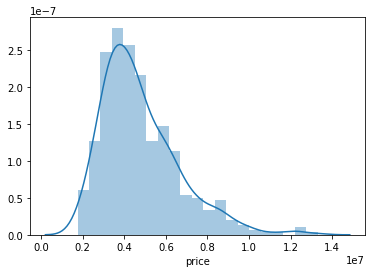

In [168]:
sns.distplot(df['price'])
plt.show()

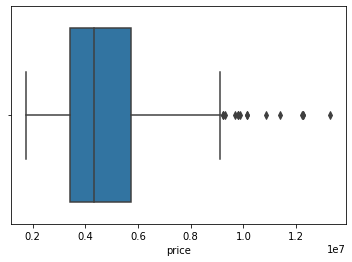

In [169]:
sns.boxplot(df['price'])
plt.show()

In [170]:
df['lprice'] = np.log(df['price'])

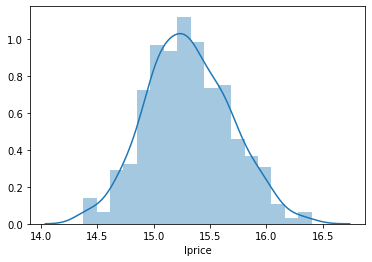

In [171]:
sns.distplot(df['lprice'])
plt.show()

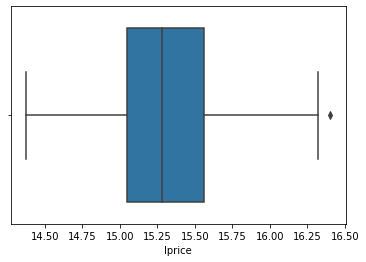

In [172]:
sns.boxplot(df['lprice'])
plt.show()

# Exploring area

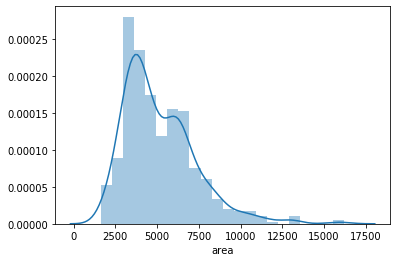

In [173]:
sns.distplot(df['area'])
plt.show()

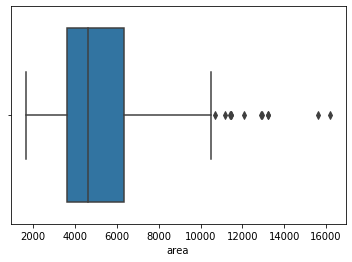

In [174]:
sns.boxplot(df['area'])
plt.show()

In [175]:
q1 = df['area'].quantile(0.25)
q3 = df['area'].quantile(0.75)
iqr = q3 - q1

df = df[~(df['area']>(q3+1.5*iqr))]

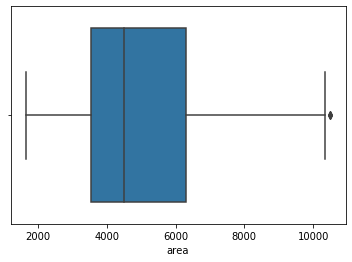

In [176]:
sns.boxplot(df['area'])
plt.show()

# Exploratory Data Analysis

# area and price

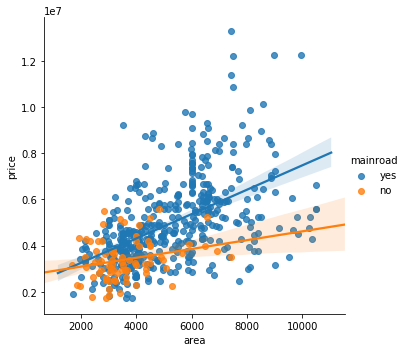

In [177]:
sns.lmplot(x='area', y = 'price',data=df, hue='mainroad')

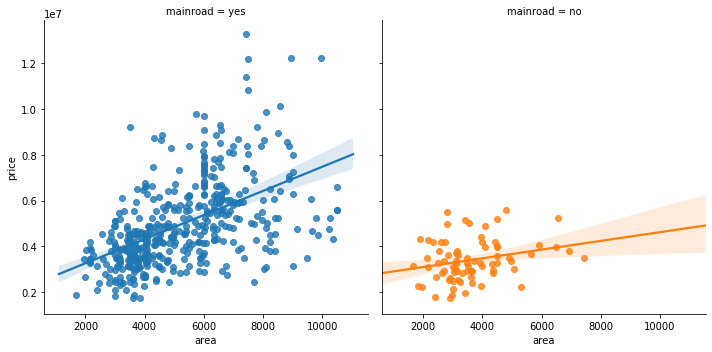

In [178]:
sns.lmplot(x='area', y = 'price',data=df, hue='mainroad', col = 'mainroad')
plt.show()

# price and furnishingstatus

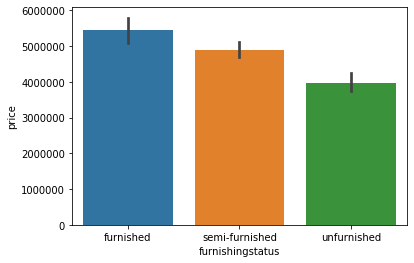

In [179]:
sns.barplot(x='furnishingstatus',y='price',data=df)

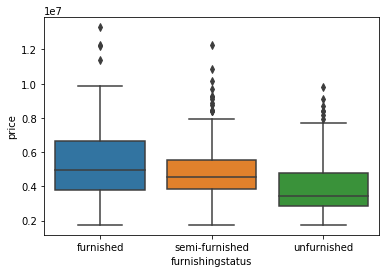

In [180]:
sns.boxplot(x='furnishingstatus',y='price',data=df)
plt.show()

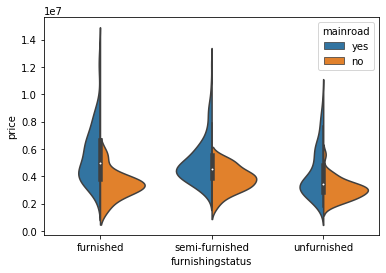

In [181]:
sns.violinplot(x='furnishingstatus',y='price',data=df, hue='mainroad', split=True)
plt.show()

# Model Building

In [182]:
df[['bathrooms','stories','parking']] = df[['bathrooms','stories','parking']].astype(object)

we will treat the above variables are objects as the range values of all the above variables were too less

In [183]:
df['furnishingstatus'].value_counts()

semi-furnished    223
unfurnished       176
furnished         134
Name: furnishingstatus, dtype: int64

In [184]:
cat_cols = list(df.select_dtypes(include='object').columns)
cat_cols

['bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [185]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [186]:
df.head()

,price,area,bedrooms,lprice,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,...,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,16.403275,1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1,12250000,8960,4,16.321036,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,12250000,9960,3,16.321036,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
3,12215000,7500,4,16.318175,1,0,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0
4,11410000,7420,4,16.250001,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0,0,0


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 544
Data columns (total 21 columns):
price                              533 non-null int64
area                               533 non-null int64
bedrooms                           533 non-null int64
lprice                             533 non-null float64
bathrooms_2                        533 non-null uint8
bathrooms_3                        533 non-null uint8
bathrooms_4                        533 non-null uint8
stories_2                          533 non-null uint8
stories_3                          533 non-null uint8
stories_4                          533 non-null uint8
mainroad_yes                       533 non-null uint8
guestroom_yes                      533 non-null uint8
basement_yes                       533 non-null uint8
hotwaterheating_yes                533 non-null uint8
airconditioning_yes                533 non-null uint8
parking_1                          533 non-null uint8
parking_2                    

In [188]:
y = df['lprice']
X = df.drop(['price','lprice'],axis=1)
X = X.assign(const=1)

In [189]:
X.head()

,area,bedrooms,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,const
0,7420,4,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
1,8960,4,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
2,9960,3,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1
3,7500,4,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1
4,7420,4,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,1


# Statistical Modeling

In [190]:
import statsmodels.api as sm

ols = sm.OLS(y, X)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     63.20
Date:                Mon, 06 Jan 2020   Prob (F-statistic):          6.28e-121
Time:                        14:32:42   Log-Likelihood:                 95.307
No. Observations:                 533   AIC:                            -150.6
Df Residuals:                     513   BIC:                            -65.04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
area                             5.358e-05   5.94e-06      9.014      0.000    4.19e-05    6.53e-05
bedrooms                            0.0383      0.015      2.499      0.013       0.008       0.068
bathrooms_2                         0.1580      0.024      6.662      0.000       0.111       0.205
bathrooms_3                         0.2734      0.072      3.817      0.000       0.133       0.414
bathrooms_4                         0.5824      0.219      2.663      0.008       0.153       1.012
stories_2                           0.0580      0.023      2.484      0.013       0.012       0.104
stories_3                           0.1975      0.040      4.935      0.000       0.119       0.276
stories_4                           0.2721      0.041      6.572      0.000       0.191       0.353
mainroad_yes                        0.1130      0.028      4.072      0.000       0.059       0.168
guestroom_yes                       0.0628      0.026      2.417      0.016       0.012       0.114
basement_yes                        0.0940      0.022      4.305      0.000       0.051       0.137
hotwaterheating_yes                 0.1502      0.045      3.373      0.001       0.063       0.238
airconditioning_yes                 0.1629      0.022      7.557      0.000       0.121       0.205
parking_1                           0.0732      0.023      3.131      0.002       0.027       0.119
parking_2                           0.1102      0.026      4.268      0.000       0.059       0.161
parking_3                          -0.0193      0.065     -0.296      0.768      -0.148       0.109
prefarea_yes                        0.1207      0.023      5.218      0.000       0.075       0.166
furnishingstatus_semi-furnished     0.0223      0.023      0.964      0.335      -0.023       0.068
furnishingstatus_unfurnished       -0.1109      0.025     -4.467      0.000      -0.160      -0.062
const                              14.5765      0.054    272.016      0.000      14.471      14.682
==============================================================================
Omnibus:                        3.054   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                3.120
Skew:                          -0.090   Prob(JB):                        0.210
Kurtosis:                       3.328   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

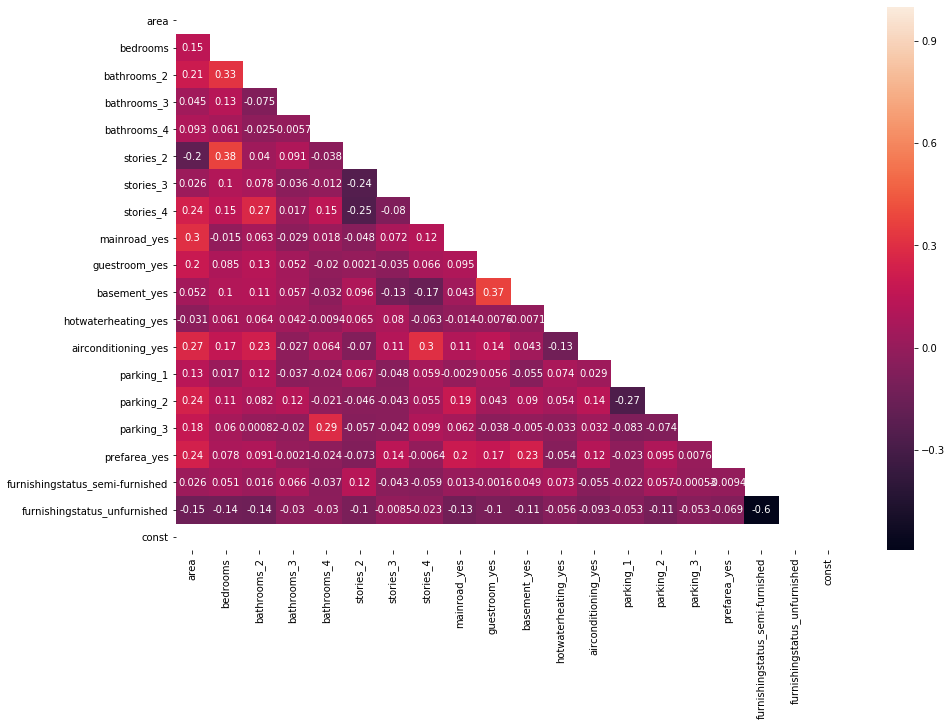

In [191]:
plt.figure(figsize=(15,10))
corr = X.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr, mask=mask, annot=True)
plt.show()

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

pd.DataFrame({'vif':vif}, index=X.columns)

,vif
area,1.520894
bedrooms,1.591152
bathrooms_2,1.312507
bathrooms_3,1.066961
bathrooms_4,1.121878
stories_2,1.678996
stories_3,1.328512
stories_4,1.525218
mainroad_yes,1.193407
guestroom_yes,1.247797


In [194]:
X = X.drop(['parking_3','furnishingstatus_semi-furnished'],axis=1)

In [195]:
import statsmodels.api as sm

ols = sm.OLS(y, X)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     70.71
Date:                Mon, 06 Jan 2020   Prob (F-statistic):          1.47e-122
Time:                        14:32:55   Log-Likelihood:                 94.771
No. Observations:                 533   AIC:                            -153.5
Df Residuals:                     515   BIC:                            -76.53
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           5.34e-05   5.84e-06      9.146      0.000    4.19e-05    6.49e-05
bedrooms                         0.0376      0.015      2.462      0.014       0.008       0.068
bathrooms_2                      0.1573      0.024      6.646      0.000       0.111       0.204
bathrooms_3                      0.2771      0.071      3.877      0.000       0.137       0.417
bathrooms_4                      0.5533      0.211      2.622      0.009       0.139       0.968
stories_2                        0.0595      0.023      2.557      0.011       0.014       0.105
stories_3                        0.1973      0.040      4.949      0.000       0.119       0.276
stories_4                        0.2715      0.041      6.563      0.000       0.190       0.353
mainroad_yes                     0.1113      0.028      4.020      0.000       0.057       0.166
guestroom_yes                    0.0622      0.026      2.405      0.017       0.011       0.113
basement_yes                     0.0937      0.022      4.298      0.000       0.051       0.137
hotwaterheating_yes              0.1519      0.044      3.417      0.001       0.065       0.239
airconditioning_yes              0.1613      0.021      7.516      0.000       0.119       0.204
parking_1                        0.0726      0.023      3.154      0.002       0.027       0.118
parking_2                        0.1112      0.025      4.373      0.000       0.061       0.161
prefarea_yes                     0.1203      0.023      5.210      0.000       0.075       0.166
furnishingstatus_unfurnished    -0.1250      0.020     -6.332      0.000      -0.164      -0.086
const                           14.5948      0.050    289.469      0.000      14.496      14.694
==============================================================================
Omnibus:                        3.334   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                3.421
Skew:                          -0.102   Prob(JB):                        0.181
Kurtosis:                       3.335   Cond. No.                     1.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Checking OLS Assumptions

In [196]:
residuals = result.resid

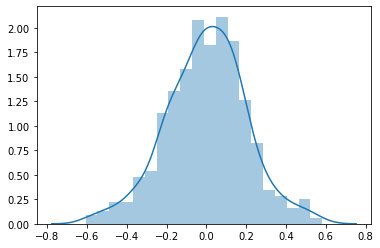

In [198]:
sns.distplot(residuals)
plt.show()

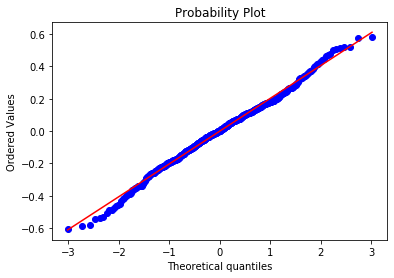

In [208]:
import scipy.stats as stats

stats.probplot(residuals,plot=plt)
plt.show()

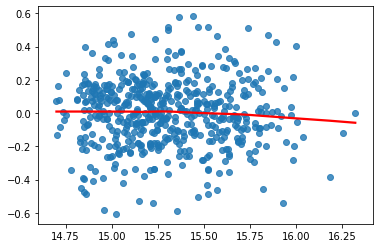

In [212]:
y_pred = result.predict(X)

sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'red'})
plt.show()

In [214]:
import statsmodels.stats.api as sms

test = sms.het_goldfeldquandt(y=result.resid, x=X)
test

(1.026967277793671, 0.4167547305902726, 'increasing')

# improving moddel accuracy by considering interaction anad transformation

In [220]:
from sklearn.preprocessing import PolynomialFeatures

X = X.drop('const',axis=1)

pf = PolynomialFeatures()
Xp = pf.fit_transform(X)
cols = pf.get_feature_names(X.columns)

Xp = pd.DataFrame(Xp, columns=cols)

In [221]:
Xp.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 171 columns):
1                                                   float64
area                                                float64
bedrooms                                            float64
bathrooms_2                                         float64
bathrooms_3                                         float64
bathrooms_4                                         float64
stories_2                                           float64
stories_3                                           float64
stories_4                                           float64
mainroad_yes                                        float64
guestroom_yes                                       float64
basement_yes                                        float64
hotwaterheating_yes                                 float64
airconditioning_yes                                 float64
parking_1                                           fl

In [224]:
ys = y.values

In [225]:
import statsmodels.api as sm

ols = sm.OLS(ys, Xp)
result = ols.fit()
result.summary()

C:\Users\krishna\New folder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\krishna\New folder\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\krishna\New folder\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\krishna\New folder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     12.38
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           1.31e-84
Time:                        15:22:03   Log-Likelihood:                 194.22
No. Observations:                 533   AIC:                            -134.4
Df Residuals:                     406   BIC:                             408.9
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
1                                                   14.3721      0.222     64.833      0.000      13.936      14.808
area                                                 0.0002   4.68e-05      3.786      0.000    8.52e-05       0.000
bedrooms                                             0.0575      0.107      0.535      0.593      -0.154       0.269
bathrooms_2                                          0.0657      0.083      0.791      0.430      -0.098       0.229
bathrooms_3                                         -0.0025      0.098     -0.025      0.980      -0.195       0.191
bathrooms_4                                       6.642e-08   3.21e-09     20.686      0.000    6.01e-08    7.27e-08
stories_2                                            0.1420      0.082      1.724      0.085      -0.020       0.304
stories_3                                            0.1952      0.279      0.700      0.484      -0.353       0.743
stories_4                                            0.2548      0.113      2.261      0.024       0.033       0.476
mainroad_yes                                        -0.0514      0.074     -0.698      0.486      -0.196       0.093
guestroom_yes                                        0.1386      0.089      1.561      0.119      -0.036       0.313
basement_yes                                        -0.0091      0.066     -0.139      0.890      -0.138       0.120
hotwaterheating_yes                                 -0.3964      0.180     -2.201      0.028      -0.750      -0.042
airconditioning_yes                                  0.0401      0.071      0.566      0.572      -0.099       0.179
parking_1                                           -0.1659      0.068     -2.428      0.016      -0.300      -0.032
parking_2                                           -0.0166      0.158     -0.105      0.917      -0.328       0.295
prefarea_yes                                        -0.1733      0.112     -1.547      0.123      -0.393       0.047
furnishingstatus_unfurnished                        -0.0261      0.059     -0.443      0.658      -0.142       0.090
area^2                                            -1.27e-08   3.16e-09     -4.016      0.000   -1.89e-08   -6.48e-09
area bedrooms                                     -4.19e-06   1.12e-05     -0.374      0.708   -2.62e-05    1.78e-05
area bathrooms_2                                  2.606e-05    1.7e-05      1.531      0.127    -7.4e-06    5.95e-05
area bathrooms_3                                  8.675e-05   7.63e-05      1.137      0.256   -6.33e-05       0.000
area bathrooms_4                                  9.958e-05   2.82e-05      3.534      0.000    4.42e-05       0.000
area stories_2                           

In [235]:
##Backward Elimination to remove insignificant variables one by one

pmax=1
cols = list(Xp.columns)
X_1 = Xp.copy()

while (len(cols)>0):
    p = []
    X_1 = X_1[cols]
    model = sm.OLS(ys, X_1).fit()
    p = model.pvalues
    pmax = max(p)
    
    if (pmax>0.05):
        cols = list(p.drop(p[p==pmax].index).index)
        #print(cols)
    else:
        break
            
selected = cols
print(selected)

['1', 'area', 'stories_2', 'stories_3', 'stories_4', 'guestroom_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking_1', 'prefarea_yes', 'furnishingstatus_unfurnished', 'area^2', 'area bathrooms_2', 'area bathrooms_4', 'area guestroom_yes', 'area hotwaterheating_yes', 'bedrooms bathrooms_4', 'bedrooms basement_yes', 'bedrooms hotwaterheating_yes', 'bedrooms parking_1', 'bedrooms parking_2', 'bathrooms_2 stories_2', 'bathrooms_2 hotwaterheating_yes', 'bathrooms_2 furnishingstatus_unfurnished', 'bathrooms_3 stories_2', 'bathrooms_3 guestroom_yes', 'bathrooms_3 airconditioning_yes', 'bathrooms_3 parking_1', 'bathrooms_3 prefarea_yes', 'bathrooms_4^2', 'bathrooms_4 stories_4', 'bathrooms_4 mainroad_yes', 'bathrooms_4 airconditioning_yes', 'stories_2^2', 'stories_3^2', 'stories_4^2', 'stories_4 mainroad_yes', 'mainroad_yes hotwaterheating_yes', 'mainroad_yes parking_1', 'mainroad_yes prefarea_yes', 'guestroom_yes^2', 'guestroom_yes parking_2', 'guestroom_yes prefarea_yes', 'basement

In [236]:
Xs = Xp.loc[:,selected]

ols = sm.OLS(ys,Xs)
result = ols.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     46.57
Date:                Mon, 06 Jan 2020   Prob (F-statistic):          2.65e-130
Time:                        15:35:35   Log-Likelihood:                 148.56
No. Observations:                 533   AIC:                            -229.1
Df Residuals:                     499   BIC:                            -83.66
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
1                                           14.4812      0.067    216.353      0.000      14.350      14.613
area                                         0.0002   2.44e-05      7.362      0.000       0.000       0.000
stories_2                                    0.0256      0.010      2.458      0.014       0.005       0.046
stories_3                                    0.1132      0.018      6.270      0.000       0.078       0.149
stories_4                                    0.0901      0.013      6.855      0.000       0.064       0.116
guestroom_yes                                0.1729      0.040      4.328      0.000       0.094       0.251
hotwaterheating_yes                         -0.3606      0.123     -2.930      0.004      -0.602      -0.119
airconditioning_yes                          0.0769      0.010      7.579      0.000       0.057       0.097
parking_1                                   -0.1254      0.044     -2.819      0.005      -0.213      -0.038
prefarea_yes                                -0.1534      0.068     -2.244      0.025      -0.288      -0.019
furnishingstatus_unfurnished                -0.0766      0.010     -7.572      0.000      -0.097      -0.057
area^2                                   -1.081e-08    2.1e-09     -5.152      0.000   -1.49e-08   -6.69e-09
area bathrooms_2                          1.584e-05   5.16e-06      3.069      0.002     5.7e-06     2.6e-05
area bathrooms_4                          7.506e-05   2.19e-05      3.432      0.001    3.21e-05       0.000
area guestroom_yes                       -5.218e-05   1.45e-05     -3.610      0.000   -8.06e-05   -2.38e-05
area hotwaterheating_yes                 -9.576e-05   3.26e-05     -2.935      0.003      -0.000   -3.17e-05
bedrooms bathrooms_4                      3.351e-08   9.76e-09      3.432      0.001    1.43e-08    5.27e-08
bedrooms basement_yes                        0.0365      0.007      5.200      0.000       0.023       0.050
bedrooms hotwaterheating_yes                 0.3232      0.077      4.209      0.000       0.172       0.474
bedrooms parking_1                           0.0642      0.024      2.651      0.008       0.017       0.112
bedrooms parking_2                           0.0284      0.008      3.483      0.001       0.012       0.044
bathrooms_2 stories_2                        0.0934      0.038      2.479      0.014       0.019       0.167
bathrooms_2 hotwaterheating_yes             -0.3532      0.115     -3.075      0.002      -0.579      -0.128
bathrooms_2 furnishingstatus_unfurnished     0.1569      0.045      3.451      0.001       0.068       0.246
bathrooms_3 stories_2                        0.2578      0.098      2.641      0.009       0.066       0.450
bathrooms_3 guestroom_yes      

# Machine Learning

In [253]:
df = pd.read_csv('Housing.csv')
df['lprice'] = np.log(df['price'])

q1 = df['area'].quantile(0.25)
q3 = df['area'].quantile(0.75)
iqr = q3-q1

df = df[~(df['area']>(q3+1.5*iqr))]

df[['bathrooms', 'stories', 'parking']] = df[['bathrooms',
                                    'stories', 'parking']].astype(object)

cat_cols = list(df.select_dtypes(include='object').columns)
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

y = df['lprice']
X = df.drop(['price', 'lprice'], axis=1)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures()

Xp = pf.fit_transform(X)
cols = pf.get_feature_names(X.columns)

Xp = pd.DataFrame(Xp, columns=cols)

In [254]:
from sklearn.model_selection import train_test_split

y = df['lprice']
X_train, X_test, y_train,y_test = train_test_split(Xp, y, test_size=0.30, random_state=1)

In [255]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

result = lr.fit(X_train, y_train)


y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [256]:
print('R-square of train :',r2_score(y_train,y_train_pred))
print('R-square of test :',r2_score(y_test,y_test_pred))

R-square of train : 0.845922328761878
R-square of test : 0.011233985025774662


# Application of RFE to reduce over-fitting

In [263]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, KFold

params = [{'n_features_to_select': list(range(1,60))}]

lr = LinearRegression()

rfe = RFE(lr)
folds=KFold(n_splits=3, random_state=1)

model_cv = GridSearchCV(rfe, param_grid=params, cv=folds)

model_cv.fit(Xp,y)

C:\Users\krishna\New folder\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=False),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [264]:
model_cv.best_params_                       # ans shub be between 6-8

{'n_features_to_select': 15}

In [266]:
lr = LinearRegression()
rfe = RFE(lr,n_features_to_select= 15)

rfe.fit(Xp,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [268]:
cols = pd.DataFrame(list(zip(Xp.columns, rfe.support_, rfe.ranking_)),
                   columns=['cols','select','rank'])
cols

,cols,select,rank
0,1,False,171
1,area,False,146
2,bedrooms,False,121
3,bathrooms_2,False,12
4,bathrooms_3,True,1
5,bathrooms_4,False,168
6,stories_2,True,1
7,stories_3,True,1
8,stories_4,False,14
9,mainroad_yes,False,18


In [269]:
cols = cols[cols['select']==True]
cols

,cols,select,rank
4,bathrooms_3,True,1
6,stories_2,True,1
7,stories_3,True,1
10,guestroom_yes,True,1
11,basement_yes,True,1
16,parking_3,True,1
18,furnishingstatus_semi-furnished,True,1
74,bathrooms_3^2,True,1
82,bathrooms_3 hotwaterheating_yes,True,1
105,stories_2^2,True,1


In [271]:
cols = cols[cols['select']==True]
cols = list(cols.loc[:,'cols'])
cols

['bathrooms_3',
 'stories_2',
 'stories_3',
 'guestroom_yes',
 'basement_yes',
 'parking_3',
 'furnishingstatus_semi-furnished',
 'bathrooms_3^2',
 'bathrooms_3 hotwaterheating_yes',
 'stories_2^2',
 'stories_3^2',
 'guestroom_yes^2',
 'basement_yes^2',
 'parking_3^2',
 'furnishingstatus_semi-furnished^2']

In [272]:
from sklearn.model_selection import train_test_split

Xp_15 = Xp.loc[:,cols]
X_train, X_test, y_train,y_test = train_test_split(Xp_15, y, test_size=0.30, random_state=1)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

result = lr.fit(X_train, y_train)


y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [273]:
print('R-square of train :',r2_score(y_train,y_train_pred))
print('R-square of test :',r2_score(y_test,y_test_pred))

R-square of train : 0.1762814346956093
R-square of test : 0.12680060434779516


In [276]:
def random(f):

    print('This is wrong')

def sample():

    print('This is correct')

ans = random(sample)

ans

This is wrong


In [278]:
def sample(text):

    result = ''

    for char in text:

        result += char * 3

    return result

In [279]:
def random(text):

    sample = text.split()

    return sample[0][0] == sample[1][0]

In [280]:
def sam(n):

    return ((abs(100 - n) <= 10) or (abs(200 - n) <= 10))

In [281]:
def sample(n):

    def division(x):

        return x // n

    return division

a = sample(0)

b = sample(1)

print(a(b(2)))

ZeroDivisionError: integer division or modulo by zero